# The length of the intervals union's 

**TASK** Given segments on a line (starting and ending positions), the task is to find its unions (as list of pairs) and length covered by these segments.

## Algorithm from book

### Implementation

In [0]:
def calculate_lenghth_v1(dots):
  # dots - list length n of pairs (start_point, end_point)
  points = []
  new_points = []
  EXCESS = 0
  m = 0
  
  for dot in dots:
    points += [(dot[0], 1), (dot[1], -1)]  # startpoint: 1, endpoint: -1
  
  points.sort(key=lambda x: (x[0], int(x[1]))) # First endpoint, then startpoint, if first num is the same
  
  for dot in points:
    EXCESS = EXCESS + dot[1] 
    
    if EXCESS==1 and dot[1]==1 and (m==0 or dot[0]!=new_points[-1][1]):  # when jump from 2->1 that isn't begining; (1,2) (2,4) don't want
      m += 1
      new_points.append([dot[0], 0])
    
    if EXCESS==0 and m>0:
      new_points[-1][1] = dot[0]
    
  return ([(dot[0], dot[1]) for dot in new_points], sum([dot[1]-dot[0] for dot in new_points]))

### Code verification

In [0]:
def calculate_lenghth_v1(dots):
  # dots - list length n of pairs (start_point, end_point)
  points = []
  starts = []
  ends = []
  MEASURE = 0
  EXCESS = 0
  m = 0
  
  for dot in dots:
    points += [(dot[0], 1), (dot[1], -1)]  # startpoint: 1, endpoint: -1
  
  points.sort(key=lambda x: (x[0], int(x[1]))) # First endpoint, then startpoint, if first num is the same
  
  for dot in points:
    EXCESS = EXCESS + dot[1] 
    
    if EXCESS==1 and dot[1]==1 and (m==0 or dot[0]!=ends[-1]):  # when jump from 2->1 that isn't begining; (1,2) (2,4) don't want
      m += 1
      starts.append(dot[0])
      ends.append(0)
      #starts[-1] = dot[0]
    
    if EXCESS==0 and m>0:
      ends[-1] = dot[0]
      
    #print(starts, '-', ends)
    #print()
   
  #print(points, '\n', starts, '\n', ends)
  for (start, end) in zip(starts, ends):
    MEASURE += end-start
    
  return ([(start, end) for start, end in zip(starts, ends)], MEASURE)

### Length test

In [17]:
calculate_lenghth_v1([(1,2), (1,3), (1,2)])

([(1, 3)], 2)

In [18]:
calculate_lenghth_v1([(1,2), (3,4), (4,5), (5.5,8), (4,4), (2,4)])

([(1, 5), (5.5, 8)], 6.5)

## My idea from lectures

### Implementation

In [0]:
class Intervaler():
  def __init__(self):
    self.dots = []
    self.n = 0
    
  def isempty(elf):
    return self.n!=0
  
  def getn(self):
    return self.n
 
  def getdots(self):
    return self.dots
  
  def __bsearch(self, x):  # find first index > then x
    low = 0
    high = self.n
  
    while(low!=high):
      mid = (low+high)//2
      if self.dots[mid][0]<=x:
        low = mid + 1
      else:
        high = mid
    return low
  
  def add(self, dot):
    if self.n==0:
      self.dots.insert(0, (dot[0], True))  # True mean (
      self.dots.insert(1, (dot[1], False)) # False mean )
      self.n += 2
      return
    
    i = self.__bsearch(dot[0])
    j = self.__bsearch(dot[1])
    
    if i==0 and j==self.n:
      self.dots.clear()
      self.n = 0
      self.add(dot)
    elif i==0:  # j!=n
      if self.dots[j][1]==True:
        self.dots.insert(0, (dot[0], True))
        self.dots.insert(j+1, (dot[1], False))
        del self.dots[1:j+1]
        self.n = self.n + 2 - j
      else:
        self.dots.insert(0, (dot[0], True))
        del self.dots[1:j+1]
        self.n = self.n +1 - j 
    elif j==self.n:  # i!=0
      if self.dots[i-1][1]==False:
        self.dots.insert(i, (dot[0], True))
        self.dots.insert(j+1, (dot[1], False))
        del self.dots[i+1:j+1]
        self.n = self.n + 2 - (j-i)
      else:
        self.dots.insert(j, (dot[1], False))
        del self.dots[i:j]
        self.n = self.n + 1 - (j-i)
    else:  # i, j 'in' list
      if self.dots[i-1][1]==False and self.dots[j][1]==True:
        self.dots.insert(i, (dot[0], True))
        self.dots.insert(j+1, (dot[1], False))
        del self.dots[i+1:j+1]
        self.n = self.n + 2 - (j-i)
      elif self.dots[i-1][1]==True and self.dots[j][1]==True:
        self.dots.insert(j, (dot[1], False))
        del self.dots[i:j]
        self.n = self.n + 1 - (j-i)
      elif self.dots[i-1][1]==False and self.dots[j][1]==False:
        self.dots.insert(i, (dot[0], True))
        del self.dots[i+1:j+1]
        self.n = self.n + 1 - (j-i)
      else:
        del self.dots[i:j]
        self.n = self.n - (j-i)
        
  def calculate_length(self, dots):
    for dot in dots:
      self.add(dot)
    new_dots = []
    j = 0
    for i in range(0, self.n, 2):
      if j==0 or new_dots[j-1][1]!=self.dots[i][0]:
        new_dots.append([self.dots[i][0], self.dots[i+1][0]])
        j += 1
      else:
        new_dots[j-1][1] = self.dots[i+1][0]
    return ([(dot[0], dot[1]) for dot in new_dots], sum([y[0]-x[0] for x, y in zip(self.dots[0::2], self.dots[1::2])]))

### Code verification

In [0]:
# Class in debug mode
class Intervaler():
  def __init__(self):
    self.dots = []
    self.n = 0
    
  def isempty(elf):
    return self.n!=0
  
  def getn(self):
    return self.n
 
  def getdots(self):
    return self.dots
  
  def printf(self):
    print('[', end='')
    for dot in self.dots:
      print('(', dot[0], ')', dot[1], ')', end='')
    print(']')
  
  def _bsearch(self, x):  # find first index 
    low = 0
    high = self.n
    if self.n != len(self.dots):
      print('ERROR')
  
    while(low!=high):
      mid = (low+high)//2
      if self.dots[mid][0]<=x:
        low = mid + 1
      else:
        high = mid
    return low
  
  def add(self, dot):
    if self.n==0:
      print('branch_initial')
      self.dots.insert(0, (dot[0], True))  # True mean (
      self.dots.insert(1, (dot[1], False)) # False mean )
      self.n += 2
      return
    
    i = self._bsearch(dot[0])
    j = self._bsearch(dot[1])
    
    if i==0 and j==self.n:
      print('branch_0')
      self.dots.clear()
      self.n = 0
      self.add(dot)
    elif i==0:  # j!=n
      if self.dots[j][1]==True:
        print('branch_10')
        self.dots.insert(0, (dot[0], True))
        self.dots.insert(j+1, (dot[1], False))
        del self.dots[1:j+1]
        self.n = self.n + 2 - j
      else:
        print('branch_11')
        self.dots.insert(0, (dot[0], True))
        del self.dots[1:j+1]
        self.n = self.n +1 - j 
    elif j==self.n:  # i!=0
      if self.dots[i-1][1]==False:
        print('branch_20')
        self.dots.insert(i, (dot[0], True))
        self.dots.insert(j+1, (dot[1], False))
        del self.dots[i+1:j+1]
        self.n = self.n + 2 - (j-i)
      else:
        print('branch_21')
        self.dots.insert(j, (dot[1], False))
        del self.dots[i:j]
        self.n = self.n + 1 - (j-i)
    else:  # i, j 'in' list
      #print('FINAL', self.dots[i-1][1], ', ', self.dots[j][1])
      if self.dots[i-1][1]==False and self.dots[j][1]==True:
        print('branch_30')
        self.dots.insert(i, (dot[0], True))
        self.dots.insert(j+1, (dot[1], False))
        del self.dots[i+1:j+1]
        self.n = self.n + 2 - (j-i)
      elif self.dots[i-1][1]==True and self.dots[j][1]==True:
        print('branch_31')
        self.dots.insert(j, (dot[1], False))
        del self.dots[i:j]
        self.n = self.n + 1 - (j-i)
      elif self.dots[i-1][1]==False and self.dots[j][1]==False:
        print('branch_32')
        self.dots.insert(i, (dot[0], True))
        del self.dots[i+1:j+1]
        self.n = self.n + 1 - (j-i)
      else:
        print('branch_33')
        del self.dots[i:j]
        self.n = self.n - (j-i)

In [0]:
i = Intervaler()
i.printf()

[]


In [0]:
i.add((5,6))
print(i.getdots())
print(i.getn())

branch_initial
[(5, True), (6, False)]
2


In [0]:
i.add((4,7))
print(i.getdots())
print(i.getn())

branch_0
branch_initial
[(4, True), (7, False)]
2


In [0]:
i.add((3,5))
print(i.getdots())
print(i.getn())

branch_11
[(3, True), (7, False)]
2


In [0]:
i.add((1,2))
print(i.getdots())
print(i.getn())

branch_10
[(1, True), (2, False), (3, True), (7, False)]
4


In [0]:
i.add((0, 2.5))
print(i.getdots())
print(i.getn())

branch_10
[(0, True), (2.5, False), (3, True), (7, False)]
4


In [0]:
i.add((2.8, 8))
print(i.getdots())
print(i.getn())

branch_20
[(0, True), (2.5, False), (2.8, True), (8, False)]
4


In [0]:
i.add((1,9))
print(i.getdots())
print(i.getn())

branch_21
[(0, True), (9, False)]
2


In [0]:
i.add((-4,-2))
print(i.getdots())
print(i.getn())

branch_10
[(-4, True), (-2, False), (0, True), (9, False)]
4


In [0]:
i.add((-1, -0.5))
print(i.getdots())
print(i.getn())

branch_30
[(-4, True), (-2, False), (-1, True), (-0.5, False), (0, True), (9, False)]
6


In [0]:
i.add((-3, -0.3))
print(i.getdots())
print(i.getn())

branch_31
[(-4, True), (-0.3, False), (0, True), (9, False)]
4


In [0]:
i.add((-0.2, 5))
print(i.getdots())
print(i.getn())

branch_32
[(-4, True), (-0.3, False), (-0.2, True), (9, False)]
4


In [0]:
i.add((-3, 8))
print(i.getdots())
print(i.getn())

branch_33
[(-4, True), (9, False)]
2


In [0]:
i.add((10, 15))
print(i.getdots())
print(i.getn())

branch_20
[(-4, True), (9, False), (10, True), (15, False)]
4


In [0]:
i.add((-15,-10))
print(i.getdots())
print(i.getn())

branch_10
[(-15, True), (-10, False), (-4, True), (9, False), (10, True), (15, False)]
6


In [0]:
i.add((-20,20))
print(i.getdots())
print(i.getn())

branch_0
branch_initial
[(-20, True), (20, False)]
2


### Length test

In [20]:
i = Intervaler()
i.calculate_length([(1,2), (1,3), (1,2)])

([(1, 3)], 2)

In [21]:
i = Intervaler()
i.calculate_length([(1,2), (3,4), (4,5), (5.5,8), (4,4), (2,4)])

([(1, 5), (5.5, 8)], 6.5)

## Time compare

In [0]:
import random
import timeit
from matplotlib import pyplot as plt

RANGE_MIN = -10
RANGE_MAX = 10
EPS = 5

### Static use

#### n = 10

In [23]:
n = 10
dots = []
for i in range(n):
  dot = random.uniform(RANGE_MIN, RANGE_MAX)
  dots.append((dot, dot+random.uniform(0, EPS)))
print(dots)

[(-8.345450870619167, -6.597819566168819), (-6.5815261717632705, -5.353366392183463), (-4.9460825832350235, -3.933070236960353), (0.5927706207556955, 1.174034719459553), (4.402967124651768, 5.893858740882097), (5.513303543620232, 10.209045359146549), (-5.923992900600171, -2.3379188334204084), (-7.997193620314755, -6.078930787403047), (1.7743871328088723, 6.167823072767967), (5.6738689846476085, 8.744358394117038)]


In [24]:
%%time
print(calculate_lenghth_v1(dots))

([(-8.345450870619167, -2.3379188334204084), (0.5927706207556955, 1.174034719459553), (1.7743871328088723, 10.209045359146549)], 15.023454362240294)
CPU times: user 941 µs, sys: 753 µs, total: 1.69 ms
Wall time: 1.64 ms


In [25]:
%%time
i = Intervaler()
print(i.calculate_length(dots))

([(-8.345450870619167, -2.3379188334204084), (0.5927706207556955, 1.174034719459553), (1.7743871328088723, 10.209045359146549)], 15.023454362240294)
CPU times: user 642 µs, sys: 155 µs, total: 797 µs
Wall time: 643 µs


#### n = 100

In [45]:
n = 100
dots = []
for i in range(n):
  dot = random.uniform(RANGE_MIN, RANGE_MAX)
  dots.append((dot, dot+random.uniform(0, EPS)))
print(dots)

[(-4.391258300920198, -0.008296782137046321), (4.725725715820888, 8.160907328985154), (1.6422935136963073, 4.322212235483239), (8.890937418423064, 11.504637919436433), (0.8811085465077912, 3.4360270224446183), (6.499258035559766, 8.590928246790522), (-1.2227543892946073, 0.9405870729860051), (9.129333204796083, 9.467317118416272), (-7.228503626502527, -4.6479015600955975), (-8.271184093356183, -6.897457988822683), (6.444058695812579, 8.513586192577561), (-4.589463278585186, -2.095561144188049), (-2.338137807559999, 0.7339210925770319), (-2.95217395456908, 1.5007398230887885), (-4.199239001445056, -3.6159281208688543), (-2.89978776886721, -0.8574482955483131), (-8.340587070328112, -7.0317941165077), (-2.028155159763118, 2.4926203036302024), (3.456321561797024, 5.6417782786000465), (-9.284341238374267, -6.356096164330516), (-2.1857527921440028, -0.958032224004195), (-4.351685564288827, -2.5204624701292957), (-6.337637949035775, -3.7439673939370994), (-7.487706462545072, -2.64118024754206

In [46]:
%%time
print(calculate_lenghth_v1(dots))

([(-9.875842804119678, 14.216840269733334)], 24.09268307385301)
CPU times: user 1.82 ms, sys: 27 µs, total: 1.85 ms
Wall time: 1.8 ms


In [47]:
%%time
i = Intervaler()
print(i.calculate_length(dots))

([(-9.875842804119678, 14.216840269733334)], 24.09268307385301)
CPU times: user 1.91 ms, sys: 0 ns, total: 1.91 ms
Wall time: 1.67 ms


#### n = 10_000

In [0]:
n = 10_000
dots = []
for i in range(n):
  dot = random.uniform(RANGE_MIN, RANGE_MAX)
  dots.append((dot, dot+random.uniform(0, EPS)))
#print(dots)

In [30]:
%%time
_, t = calculate_lenghth_v1(dots)
print(t)

24.812414538814288
CPU times: user 31.8 ms, sys: 4.92 ms, total: 36.7 ms
Wall time: 37.7 ms


In [31]:
%%time
i = Intervaler()
_, t = i.calculate_length(dots)
print(t)

24.812414538814288
CPU times: user 28.1 ms, sys: 1.73 ms, total: 29.9 ms
Wall time: 31.3 ms


#### n = 1_000_000

In [0]:
n = 1_000_000
dots = []
for i in range(n):
  dot = random.uniform(RANGE_MIN, RANGE_MAX)
  dots.append((dot, dot+random.uniform(0, EPS)))
#print(dots)

In [33]:
%%time
_, t = calculate_lenghth_v1(dots)
print(t)

24.98405892934086
CPU times: user 8.42 s, sys: 260 ms, total: 8.68 s
Wall time: 8.66 s


In [34]:
%%time
i = Intervaler()
_, t = i.calculate_length(dots)
print(t)

24.98405892934086
CPU times: user 2.6 s, sys: 2.54 ms, total: 2.61 s
Wall time: 2.61 s


#### n = 10_000_000

In [0]:
n = 10_000_000
dots = []
for i in range(n):
  dot = random.uniform(RANGE_MIN, RANGE_MAX)
  dots.append((dot, dot+random.uniform(0, EPS)))
#print(dots)

In [36]:
%%time
_, t = calculate_lenghth_v1(dots)
print(t)

24.996812995400866
CPU times: user 1min 48s, sys: 3.08 s, total: 1min 51s
Wall time: 1min 51s


In [37]:
%%time
i = Intervaler()
_, t = i.calculate_length(dots)
print(t)

24.996812995400866
CPU times: user 25.9 s, sys: 2.39 ms, total: 25.9 s
Wall time: 25.9 s


In [38]:
print(dots[0:10])
del dots

[(2.8507356221671376, 7.485980376975838), (-6.583549224699022, -2.276918014383293), (7.087610260816842, 7.884622882713948), (-0.8202404024384347, 0.0819161361064824), (0.873073728629258, 4.80891742848638), (-0.16358103417925918, 4.643670592264076), (-4.926664374065551, -3.8368107409099066), (-5.4661229540021905, -2.762277694352495), (-0.6773591153350722, 0.8008470090876947), (-0.5119495352483661, 2.7970942936013503)]


#### Visualise

In [48]:
Ns = [1, 10, 100, 1000, 10_000, 100_000, 1_000_000, 10_000_000]

time_v1 = []
time_v2 = []
time_sort = []
dots = []

for n in Ns:
  for i in range(n):
    dot = random.uniform(RANGE_MIN, RANGE_MAX)
    dots.append((dot, dot+random.uniform(0, EPS)))
    
  start = timeit.default_timer()
  _, t = calculate_lenghth_v1(dots)
  stop = timeit.default_timer()
  time_v1.append(stop-start)
  
  i = Intervaler()
  start = timeit.default_timer()
  _, t = i.calculate_length(dots)
  stop = timeit.default_timer()
  time_v2.append(stop-start)
  
  start = timeit.default_timer()
  dots.sort(key=lambda x: (x[0], int(x[1])))
  stop = timeit.default_timer()
  time_sort.append(stop-start)
  
  del i
  dots.clear()
  print(n)

1
10
100
1000
10000
100000
1000000
10000000


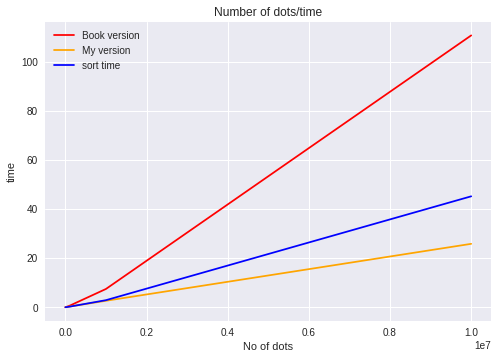

In [50]:
plt.title('Number of dots/time')
plt.xlabel('No of dots')
plt.ylabel('time')
plt.plot(Ns, time_v1, color='red', label='Book version')
plt.plot(Ns, time_v2, color='orange', label='My version')
plt.plot(Ns, time_sort, color='blue', label='sort time')
plt.legend()
plt.show()

In [59]:
Ns = range(10, 1_000_000, 10_000)

time_v1 = []
time_v2 = []
time_sort = []
dots = []

for n in Ns:
  for i in range(n):
    dot = random.uniform(RANGE_MIN, RANGE_MAX)
    dots.append((dot, dot+random.uniform(0, EPS)))
    
  start = timeit.default_timer()
  _, t = calculate_lenghth_v1(dots)
  stop = timeit.default_timer()
  time_v1.append(stop-start)
  
  i = Intervaler()
  start = timeit.default_timer()
  _, t = i.calculate_length(dots)
  stop = timeit.default_timer()
  time_v2.append(stop-start)
  
  start = timeit.default_timer()
  dots.sort(key=lambda x: (x[0], int(x[1])))
  stop = timeit.default_timer()
  time_sort.append(stop-start)
  
  del i
  dots.clear()
  print(n)

10
10010
20010
30010
40010
50010
60010
70010
80010
90010
100010
110010
120010
130010
140010
150010
160010
170010
180010
190010
200010
210010
220010
230010
240010
250010
260010
270010
280010
290010
300010
310010
320010
330010
340010
350010
360010
370010
380010
390010
400010
410010
420010
430010
440010
450010
460010
470010
480010
490010
500010
510010
520010
530010
540010
550010
560010
570010
580010
590010
600010
610010
620010
630010
640010
650010
660010
670010
680010
690010
700010
710010
720010
730010
740010
750010
760010
770010
780010
790010
800010
810010
820010
830010
840010
850010
860010
870010
880010
890010
900010
910010
920010
930010
940010
950010
960010
970010
980010
990010


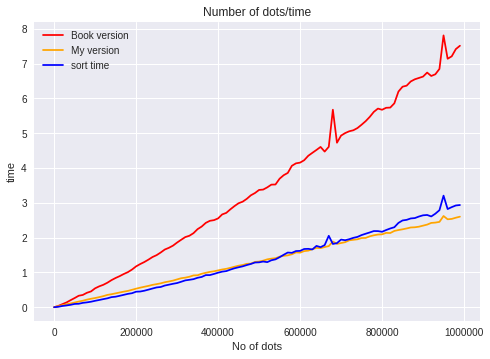

In [60]:
plt.title('Number of dots/time')
plt.xlabel('No of dots')
plt.ylabel('time')
plt.plot(Ns, time_v1, color='red', label='Book version')
plt.plot(Ns, time_v2, color='orange', label='My version')
plt.plot(Ns, time_sort, color='blue', label='sort time')
plt.legend()
plt.show()

### Small check

In [0]:
for (i, n) in enumerate(Ns):
  print('n: ', n)
  print('n*log(n): ', n*np.log(n))
  start = timeit.default_timer()
  for j in range(int(n*np.log(n))):
    j += 1
  stop = timeit.default_timer()
  print('O(n*log(n)): ', stop-start)
  print('time_sort[n]: ', time_sort[i])
  print('time_v1[n]: ', time_v1[i])
  print('time_v2[n]: ', time_v2[i], '\n')

n:  1
n*log(n):  0.0
O(n*log(n)):  6.976700024097227e-05
time_sort[n]:  3.2059997465694323e-06
time_v1[n]:  1.4568999176844954e-05
time_v2[n]:  1.446599890186917e-05 

n:  10
n*log(n):  23.02585092994046
O(n*log(n)):  4.4641999920713715e-05
time_sort[n]:  5.578000127570704e-06
time_v1[n]:  2.373500137764495e-05
time_v2[n]:  4.894700032309629e-05 

n:  100
n*log(n):  460.51701859880916
O(n*log(n)):  9.177099855151027e-05
time_sort[n]:  5.351999971026089e-05
time_v1[n]:  0.00019484400036162697
time_v2[n]:  0.00028338099946267903 

n:  1000
n*log(n):  6907.755278982137
O(n*log(n)):  0.0008550279999326449
time_sort[n]:  0.0007236920009745518
time_v1[n]:  0.002181826999731129
time_v2[n]:  0.0028198280015203636 

n:  10000
n*log(n):  92103.40371976183
O(n*log(n)):  0.010754208000435028
time_sort[n]:  0.010382888000094681
time_v1[n]:  0.03188218200011761
time_v2[n]:  0.027472295998450136 

n:  100000
n*log(n):  1151292.546497023
O(n*log(n)):  0.13416586600033042
time_sort[n]:  0.1675680160005

### Dinamic use

In [0]:
# Special benefits of my methods in online version of this problem
# Real time application etc.
# Imagine my dots come through time, and in every moment I need to now live unions of segments (coverage) and it length
# In v1, I need to sort my array for every new dot (ok, I can modify this, just binary insert :))
import gc
gc.collect()

# Hardware specifications

In [0]:
from psutil import *

In [5]:
cpu_count()

2

In [6]:
cpu_stats()

scpustats(ctx_switches=245536, interrupts=166649, soft_interrupts=115824, syscalls=0)

In [7]:
!cat /proc/cpuinfo

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 63
model name	: Intel(R) Xeon(R) CPU @ 2.30GHz
stepping	: 0
microcode	: 0x1
cpu MHz		: 2300.000
cache size	: 46080 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid pni pclmulqdq ssse3 fma cx16 sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm pti ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 avx2 smep bmi2 erms xsaveopt arat arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf
bogomips	: 4600.00
clflush size	: 64
cache_alignment	: 64
address sizes	: 46 bits physical, 48 bits virtual
power management:

processor	: 1
vendor_id	: GenuineIntel
cpu family	: 6
model		: 63
mode

In [8]:
!df -h

Filesystem      Size  Used Avail Use% Mounted on
overlay          40G   17G   21G  45% /
tmpfs           6.4G     0  6.4G   0% /dev
tmpfs           6.4G     0  6.4G   0% /sys/fs/cgroup
tmpfs           6.4G  4.0K  6.4G   1% /var/colab
/dev/sda1        46G   20G   26G  44% /etc/hosts
shm             6.0G     0  6.0G   0% /dev/shm
tmpfs           6.4G     0  6.4G   0% /sys/firmware


In [9]:
virtual_memory()

svmem(total=13655257088, available=12970729472, percent=5.0, used=407261184, free=11780886528, active=476659712, inactive=1180975104, buffers=63373312, cached=1403736064, shared=839680, slab=130387968)

In [13]:
# memory footprint support libraries/code
!ln -sf /opt/bin/nvidia-smi /usr/bin/nvidia-smi
!pip install gputil
!pip install psutil
!pip install humanize
import psutil
import humanize
import os
def printm():
  process = psutil.Process(os.getpid())
  print("Gen RAM Free: " + humanize.naturalsize( psutil.virtual_memory().available ), " | Proc size: " + humanize.naturalsize( process.memory_info().rss))
printm()

Gen RAM Free: 13.0 GB  | Proc size: 142.2 MB


# Graphic check

In [0]:
from matplotlib import pyplot
import numpy as np
import timeit
from functools import partial
import random

In [0]:
def flinear(N):
    """
    O(n) function
    """
    x = [i for i in range(N)]

In [0]:
def plotTC(fn, nMin, nMax, nInc, nTests):
    """
    Run timer and plot time complexity
    """
    x = []
    y = []
    for i in range(nMin, nMax, nInc):
        N = i
        testNTimer = timeit.Timer(partial(fn, N))
        t = testNTimer.timeit(number=nTests)
        x.append(i)
        y.append(t)
    p1 = pyplot.plot(x, y, '.')
    #pyplot.legend([p1,], [fn.__name__, ])

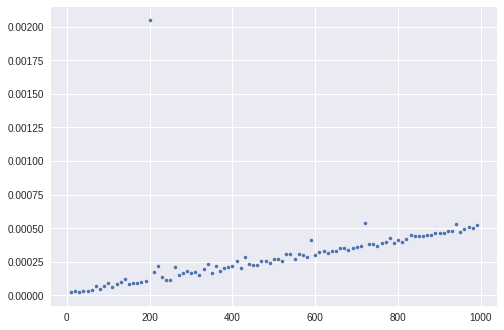

In [84]:
 plotTC(flinear, 10, 1000, 10, 10)

In [0]:
def fsort(N):
    x = list(range(N))
    random.shuffle(x)
    x.sort()

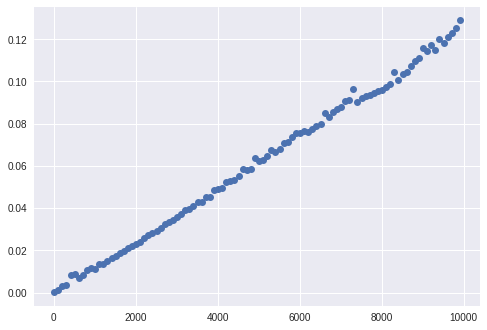

In [77]:
plotTC(fsort, 10, 10000, 100, 10)